# Ready-to-eat food delivery application

The results of two Type 5 tests have come back (5_task_1, 5_task_2):
- The first one tested the resolution of food photos in the app: users were shown either rectangular or the new square ones 
- In the second: the order button was updated, and some users saw the old version and some saw the new one.

Differences could be encountered. The task is to test hypotheses, draw appropriate conclusions on the basis of statistical tests and make decisions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Function to print all information about DataFrame
def review_dataframe(df):
    print(" DATA INFO ".center(125,'-'))
    print(df.info())
    
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)
    
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())

## Exp. №1

In [3]:
df_image = pd.read_csv('data/5_task_1.csv')
df_image.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
review_dataframe(df_image)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.3+ KB
None
------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:30000
Columns:3
--------------------------------------------------------- DATA TYPES --------------------------------------------------------
id         int64
group     object
events     int64
dtype: object
----------------------------------------------------- STATISTICS OF DATA ----------------------------------------------------
                  id  group        events
count   30000.000000  3

In [5]:
# Checking whether the variance within groups is approximately equal (homogeneous) using Levene's test
a_events = df_image.query('group == "A"').events
b_events = df_image.query('group == "B"').events
c_events = df_image.query('group == "C"').events

ss.levene(a_events,b_events, c_events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

RESULT: The variances of the groups are the same

In [6]:
# Checking for normal distribution using the Shapiro-Wilk test
ss.shapiro(a_events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [7]:
ss.shapiro(b_events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980818629264832, pvalue=0.3186272084712982)

In [8]:
ss.shapiro(c_events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981189966201782, pvalue=0.3360903561115265)

RESULT: They are normal distributions

In [9]:
# Comparison of group average
df_image.groupby('group').events.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,10000.0,29.5796,10.079376,-6.0,23.0,30.0,36.0,63.0
B,10000.0,37.6136,9.848360,0.0,31.0,38.0,44.0,75.0
C,10000.0,27.4703,9.959048,-7.0,21.0,27.0,34.0,62.0


In [10]:
ss.f_oneway(a_events, b_events, c_events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

RESULT: Based on this finding, we can conclude that there is a statistically significant difference in mean values between the groups, and the null hypothesis (hypothesis of equality of mean values) is rejected.

In [11]:
# Using Tukey's criterion and determining between which groups there are statistically significant differences
pairwise_tukeyhsd(df_image['events'], groups=df_image['group']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


<Axes: xlabel='group', ylabel='events'>

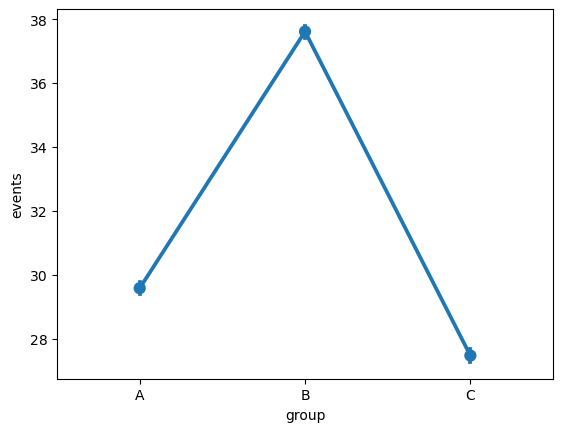

In [12]:
sns.pointplot(data=df_image, x='group', y='events')

RESULT: Thus, in this finding, groups A, B, and C are statistically significantly different from each other, and the mean values between them are statistically significant. Specifically, the pair of groups A and B, A and C, and B and C have statistically significant differences.

### Based on the above, we can conclude that it is better to use square pictures, as the mean value is the highest and statistically significantly different from groups A and C

## Exp. №2

In [13]:
df_button = pd.read_csv('data/5_task_2.csv')
df_button.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [14]:
review_dataframe(df_button)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB
None
------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:100000
Columns:4
--------------------------------------------------------- DATA TYPES --------------------------------------------------------
id           int64
group       object
segment     object
events     float64
dtype: object
----------------------------------------------------- STATISTICS OF DATA ---------------------------

Text(0.5, 1.0, 'Control Group')

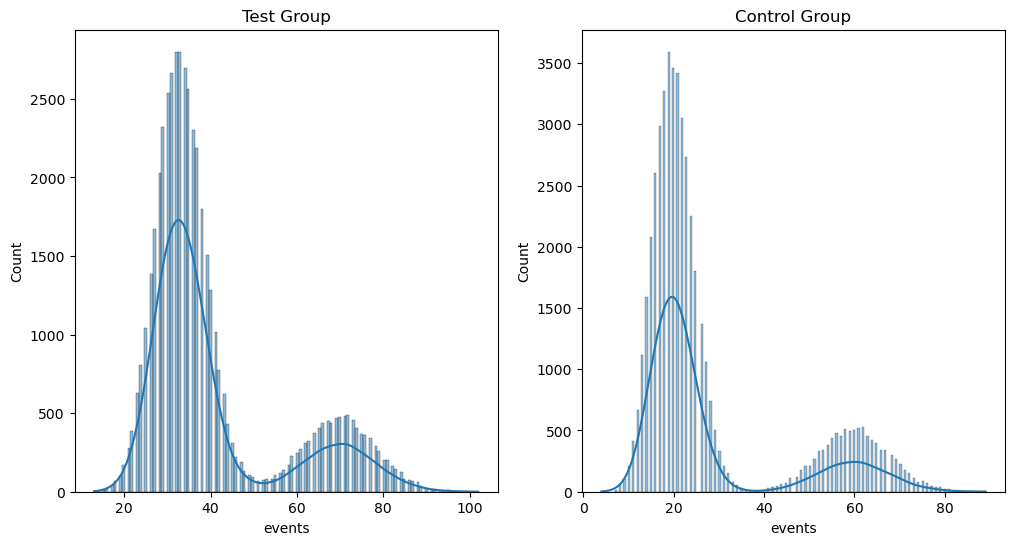

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df_button.query('group=="test"').events, kde=True, ax=ax[0])
ax[0].set_title("Test Group")

sns.histplot(df_button.query('group=="control"').events, kde=True, ax=ax[1])
ax[1].set_title("Control Group")

In [16]:
df_button.groupby(['group', 'segment']).events.describe().T

group         control                        test              
segment          high           low          high           low
count    10000.000000  40000.000000  10000.000000  40000.000000
mean        59.970800     20.031575     69.938500     33.025925
std          7.805347      4.473576      8.403974      5.720845
min         31.000000      4.000000     40.000000     13.000000
25%         55.000000     17.000000     64.000000     29.000000
50%         60.000000     20.000000     70.000000     33.000000
75%         65.000000     23.000000     76.000000     37.000000
max         89.000000     41.000000    102.000000     59.000000

In [17]:
# Using multivariate analysis of variance
# Model formula: events ~ segment + group + segment:group
model = smf.ols(data=df_button, formula='events ~ segment + group + segment:group').fit()
aov_table=anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


RESULT:

segment, group and segment:group have low p-values (0.0 and very close to 0), indicating a statistically significant effect of each factor on the dependent variable.

Residual represents the residual sum of squares which explains the variability not explained by the model.

Overall, the conclusion suggests that all the factors considered (segment, group and their interaction segment:group) have a statistically significant effect on the dependent variable.

In [18]:
df_button['combination'] = df_button.group + " \ " + df_button.segment

In [19]:
df_button

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [20]:
pairwise_tukeyhsd(df_button.events, groups=df_button.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,0.0,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,0.0,9.7551,10.1803,True
control \ high,test \ low,-26.9449,0.0,-27.113,-26.7768,True
control \ low,test \ high,49.9069,0.0,49.7388,50.075,True
control \ low,test \ low,12.9944,0.0,12.888,13.1007,True
test \ high,test \ low,-36.9126,0.0,-37.0807,-36.7445,True


RESULTS:
- All comparisons between groups have p-values equal to 0.0, which means that all differences between groups are statistically significant at the significance level of 0.05.

- The "control" group has a statistically significant difference in mean values with the "high" and "low" groups, as well as with the "test" group both "high" and "low".

- The "test" group has a statistically significant difference in mean values between "high" and "low".

- The "high" and "low" groups also have a statistically significant difference in mean values.

Overall, the conclusion suggests that there is a statistically significant difference between all pairs of groups and all comparisons were labeled as statistically significant.

<Axes: xlabel='group', ylabel='events'>

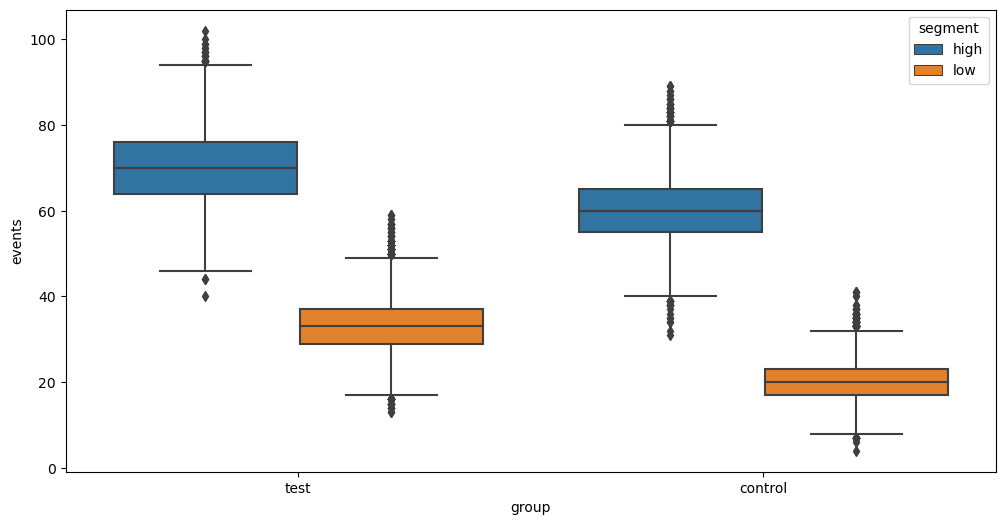

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_button, x='group', y='events', hue='segment')

### The factor 'group' was found to be significant, the factor 'segment' was found to be significant and their interaction was found to be significant. Judging by the graph, the average value of 'events' has increased, so we can make a decision: use the new version.